In [1]:
# IMPORT HERE!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [143]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

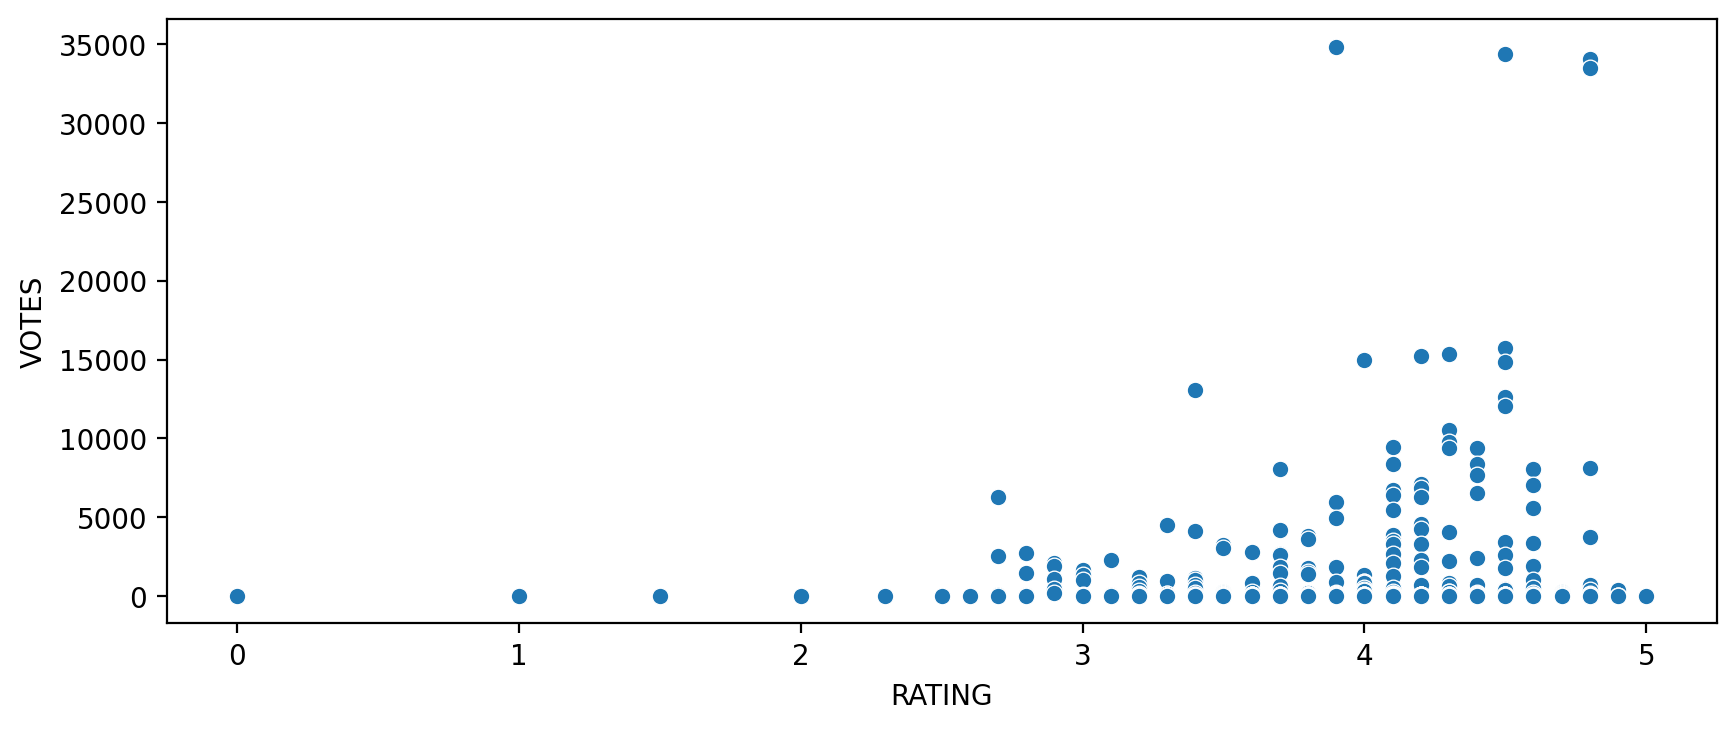

In [10]:
# CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [11]:
# CODE HERE
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [47]:
# CODE HERE
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [48]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [49]:
#CODE HERE
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

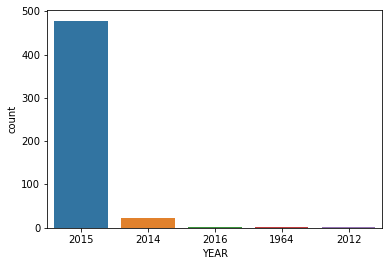

In [50]:
#CODE HERE
sns.countplot(data=fandango,x='YEAR')

In [54]:
#CODE HERE
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [58]:
#CODE HERE
fandango['VOTES'].value_counts()[0]

69

In [59]:
#CODE HERE
fan_reviewd = fandango[fandango['VOTES']>0]

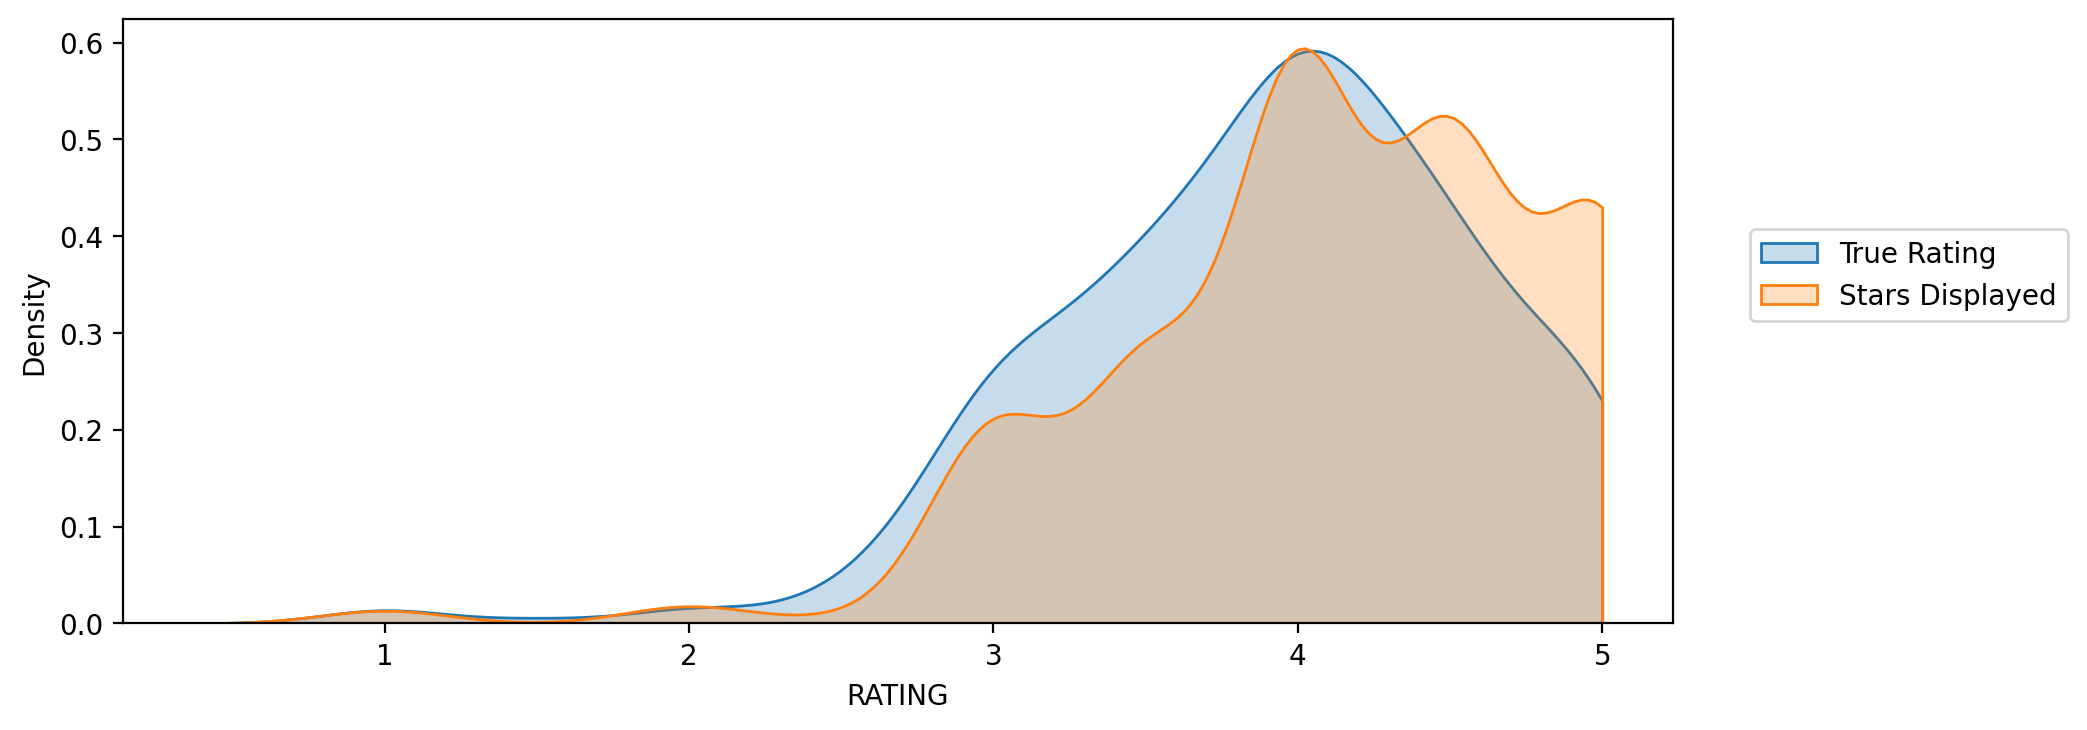

In [75]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=fan_reviewd,x='RATING',shade='fill',clip=(0,5),label='True Rating')
sns.kdeplot(data=fan_reviewd,x='STARS',shade='fill',clip=(0,5),label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [77]:
#CODE HERE
fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS']-fan_reviewd['RATING']

<ipython-input-77-50d1328c36ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS']-fan_reviewd['RATING']


In [81]:
fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS_DIFF'].round(2)

<ipython-input-81-399daa2f1f26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS_DIFF'].round(2)


In [82]:
fan_reviewd

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

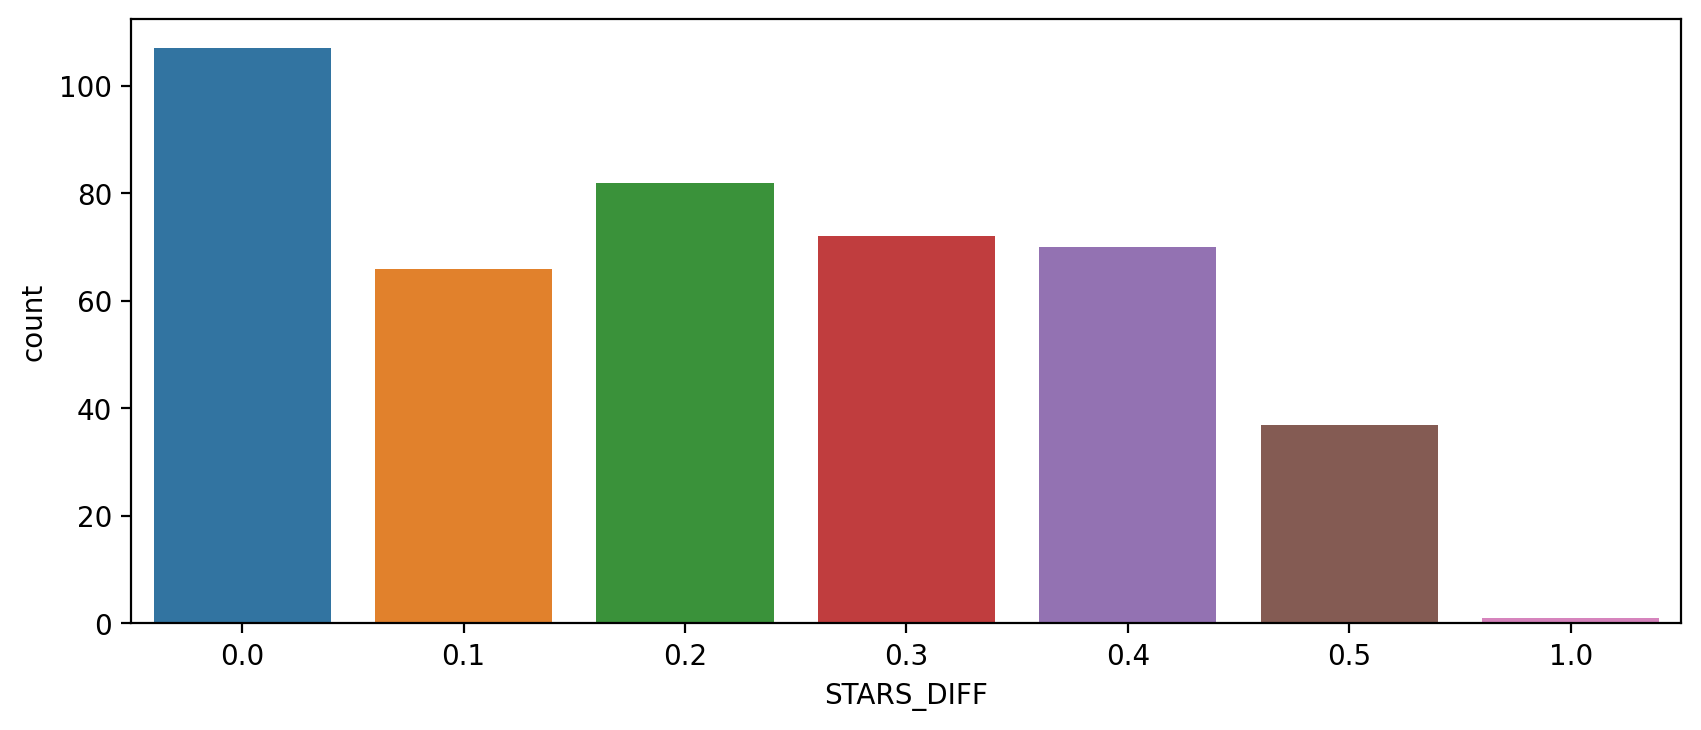

In [83]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=fan_reviewd,x='STARS_DIFF')

In [84]:
#CODE HERE
fan_reviewd[fan_reviewd['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [85]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [86]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [87]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [88]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

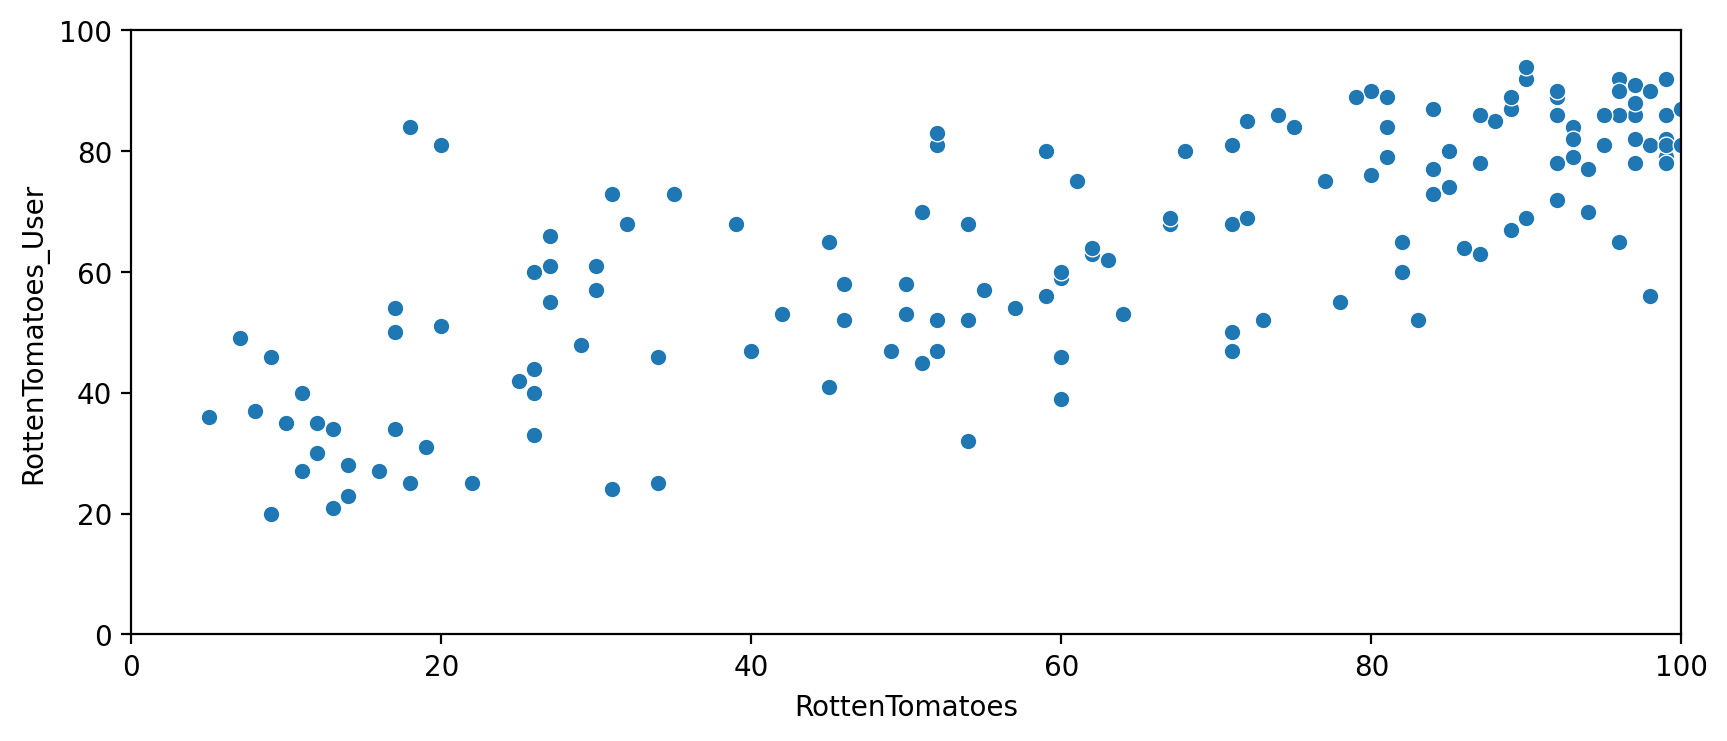

In [91]:
# CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

(0.0, 100.0)

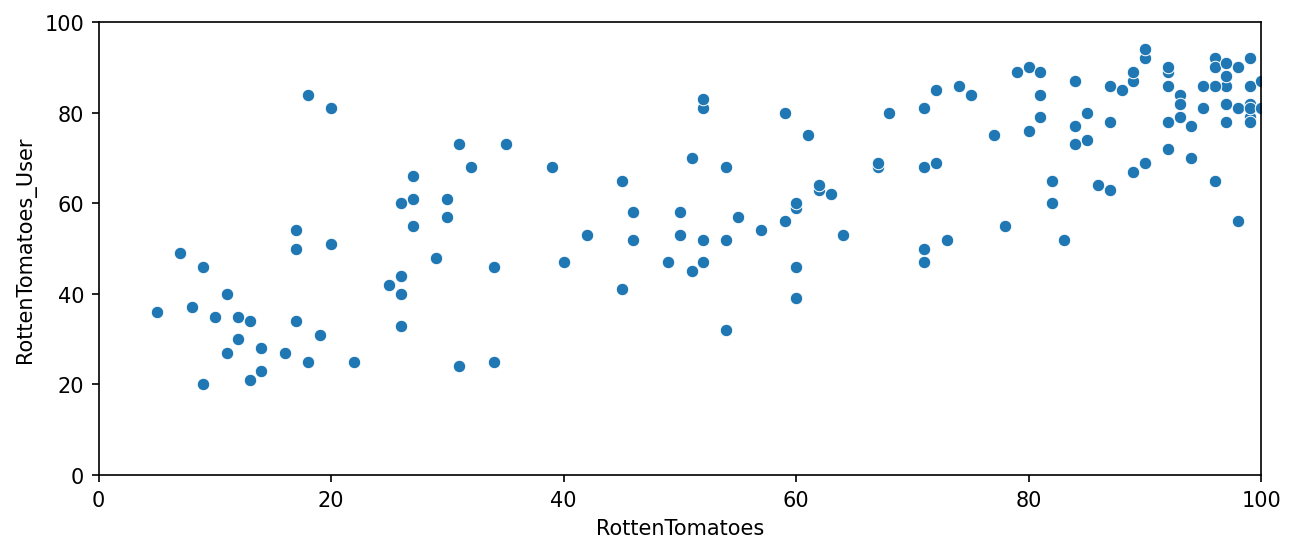

In [92]:
#CODE HERE
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [93]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [96]:
# CODE HERE
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

15.095890410958905

<Figure size 2000x1200 with 0 Axes>

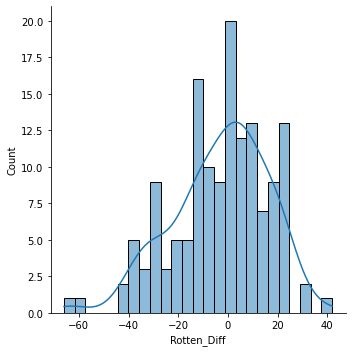

In [144]:
#CODE HERE
plt.figure(figsize=(10,6),dpi=200)
sns.displot(data=all_sites,x='Rotten_Diff',kde=True,bins=25);
# plt.title('RT CRITICS SCORE minus RT USER SCORE')

<Figure size 2000x1200 with 0 Axes>

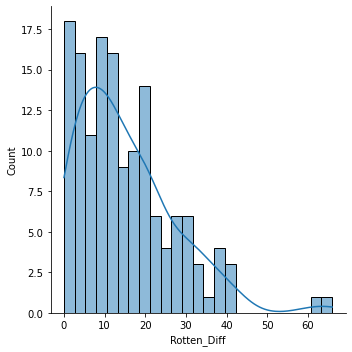

In [114]:
#CODE HERE
plt.figure(figsize=(10,6),dpi=200)
sns.displot(data=all_sites['Rotten_Diff'].abs(),kde=True,bins=25);

In [122]:
# CODE HERE
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [124]:
# CODE HERE
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

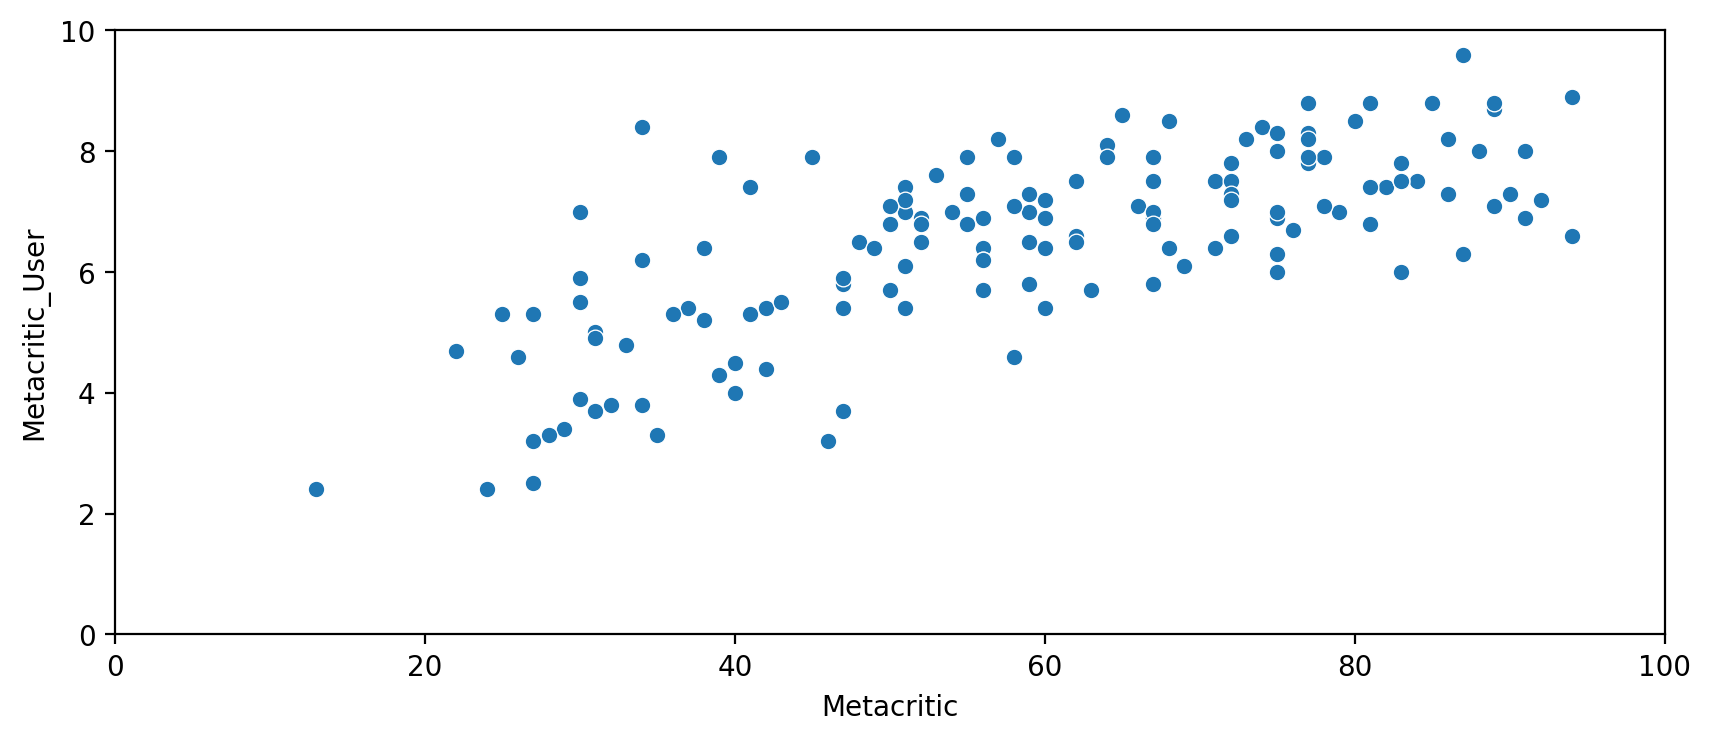

In [128]:
# CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

(0.0, 10.0)

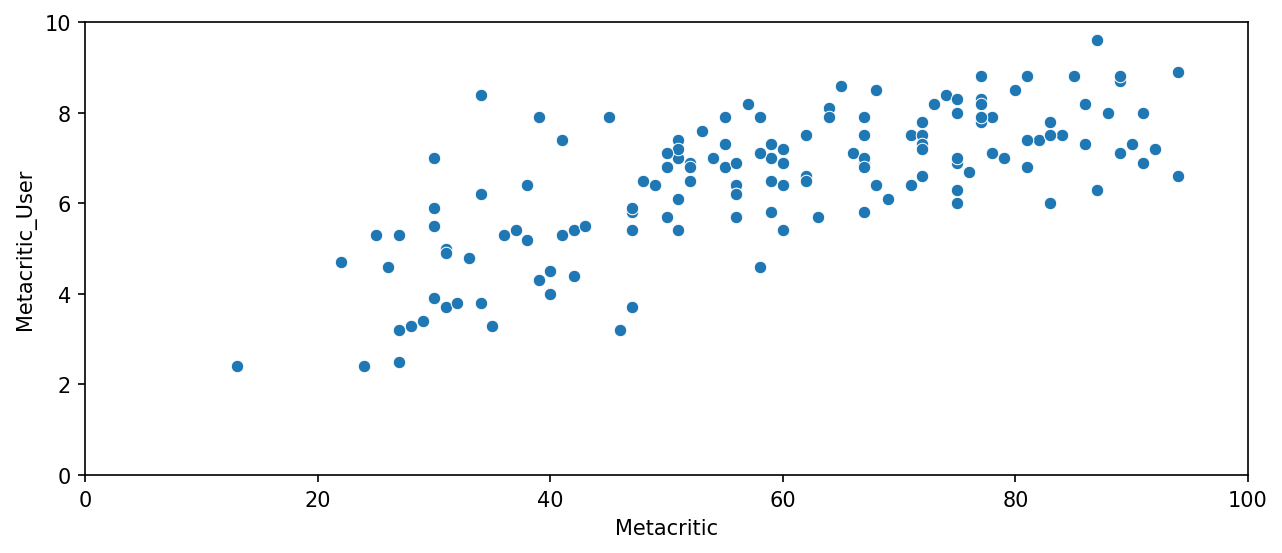

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

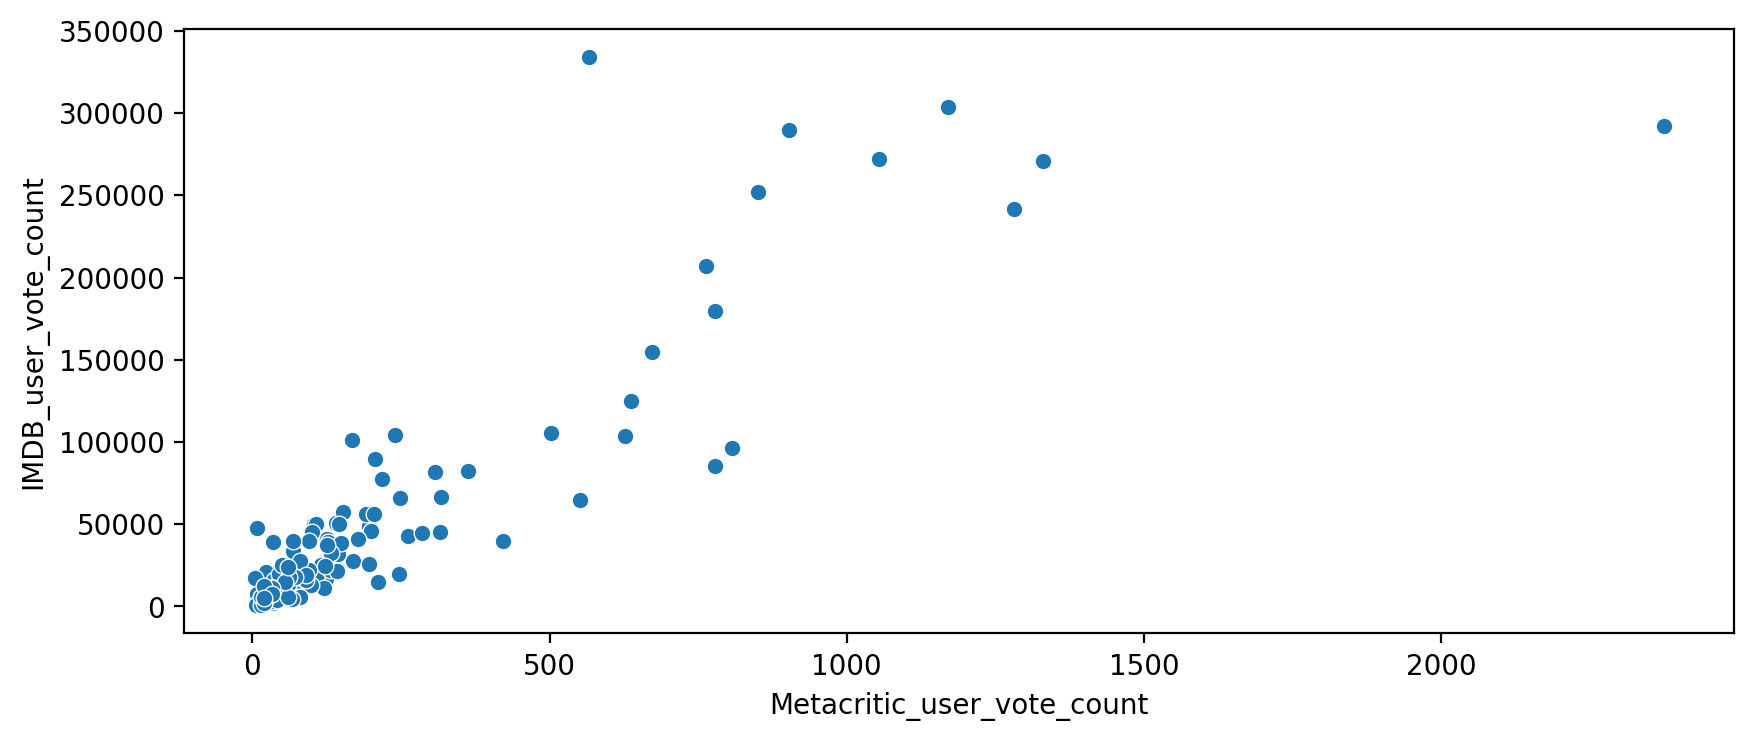

In [129]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

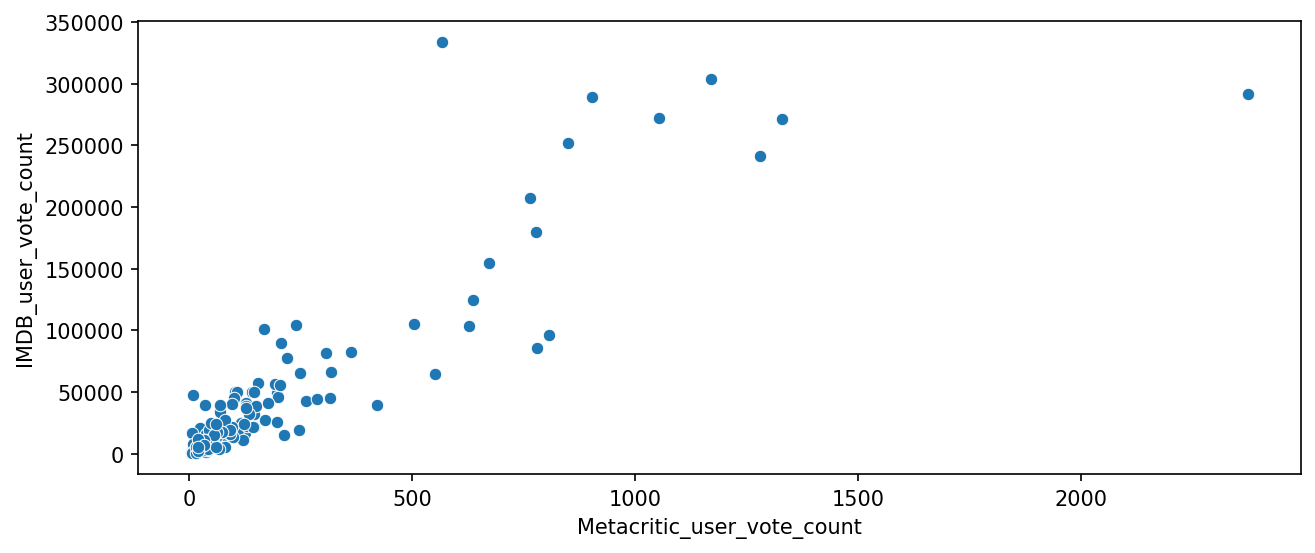

In [130]:
#CODE HERE
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**TASK: What movie has the highest Metacritic User Vote count?**

In [228]:
#CODE HERE

In [131]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [151]:
#CODE HERE
combine_df=pd.merge(fandango,all_sites,how='inner',on='FILM')

In [152]:
combine_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [234]:
# CODE HERE

In [160]:
combine_df['RT_Norm'] = np.round(combine_df['RottenTomatoes']/20,1)
combine_df['RTU_Norm'] = np.round(combine_df['RottenTomatoes_User']/20,1)

In [161]:
combine_df['Meta_Norm'] = np.round(combine_df['Metacritic']/20,1)
combine_df['Meta_U_Norm'] = np.round(combine_df['Metacritic_User']/2,1)

In [162]:
combine_df['IMDB_Norm'] = np.round(combine_df['IMDB']/2,1)

In [163]:
combine_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [164]:
#CODE HERE
combine_df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [166]:
norm_scores = combine_df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [168]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


# Comparing Distribution of Scores Across Sites

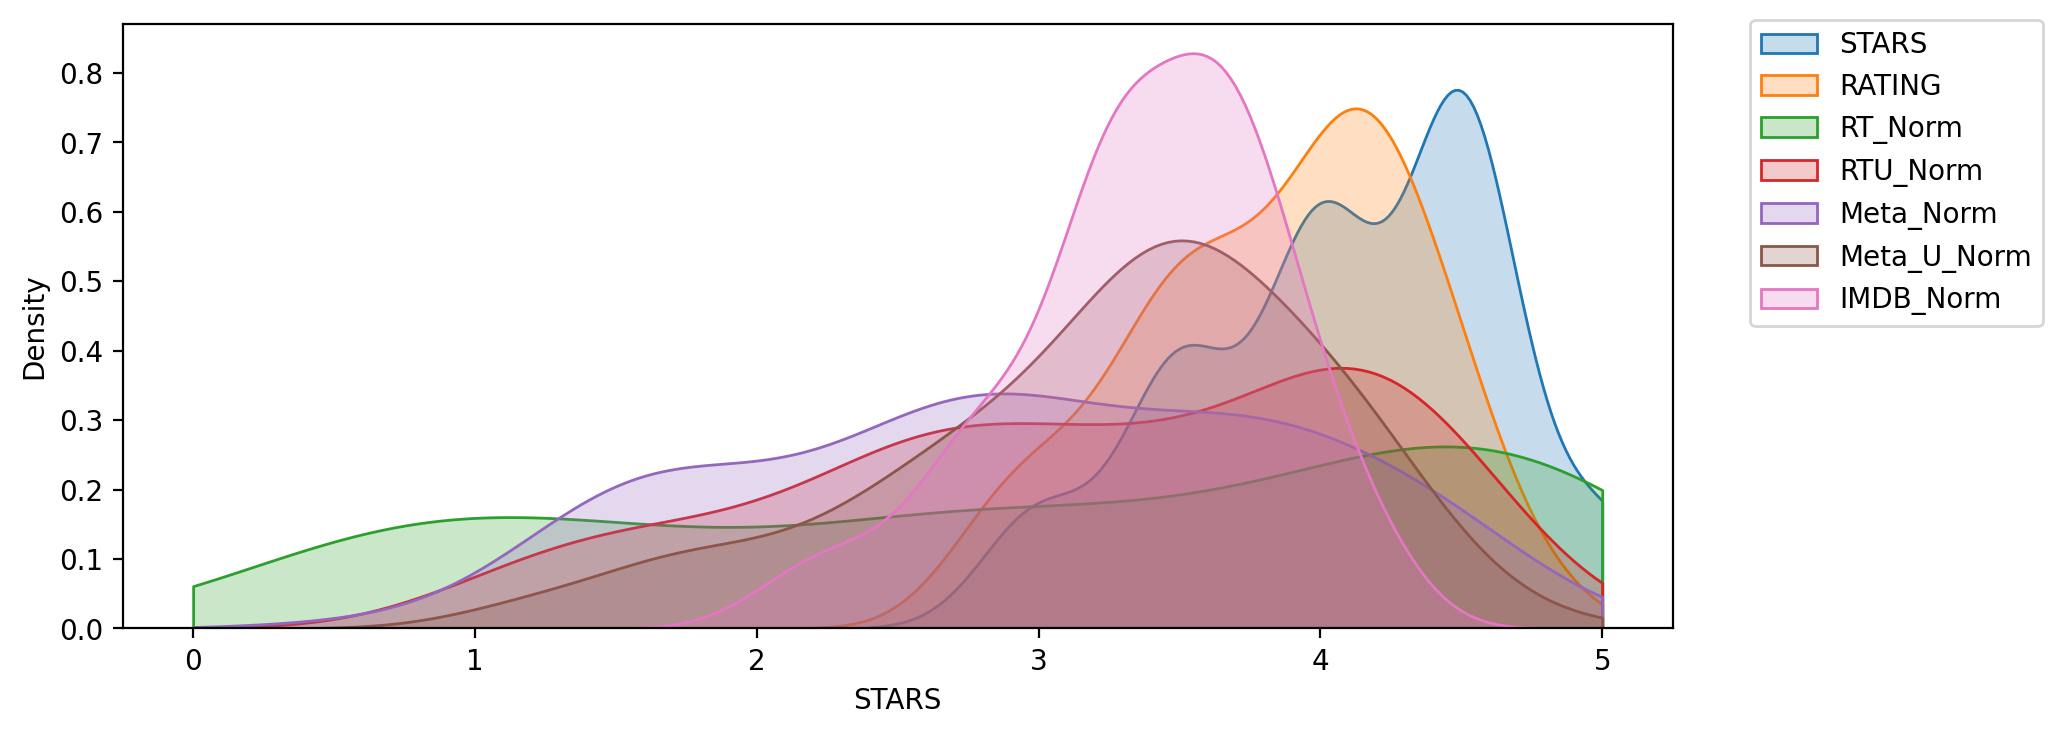

In [182]:
#CODE HERE
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores,x='STARS',shade=True,label='STARS',clip=[0,5])
sns.kdeplot(data=norm_scores,x='RATING',shade=True,label='RATING',clip=[0,5])
sns.kdeplot(data=norm_scores,x='RT_Norm',shade=True,label='RT_Norm',clip=[0,5])
sns.kdeplot(data=norm_scores,x='RTU_Norm',shade=True,label='RTU_Norm',clip=[0,5])
sns.kdeplot(data=norm_scores,x='Meta_Norm',shade=True,label='Meta_Norm',clip=[0,5])
sns.kdeplot(data=norm_scores,x='Meta_U_Norm',shade=True,label='Meta_U_Norm',clip=[0,5])
sns.kdeplot(data=norm_scores,x='IMDB_Norm',shade=True,label='IMDB_Norm',clip=[0,5])
plt.legend(loc=(1.05,0.5))

In [189]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

<AxesSubplot:xlabel='RT_Norm', ylabel='Density'>

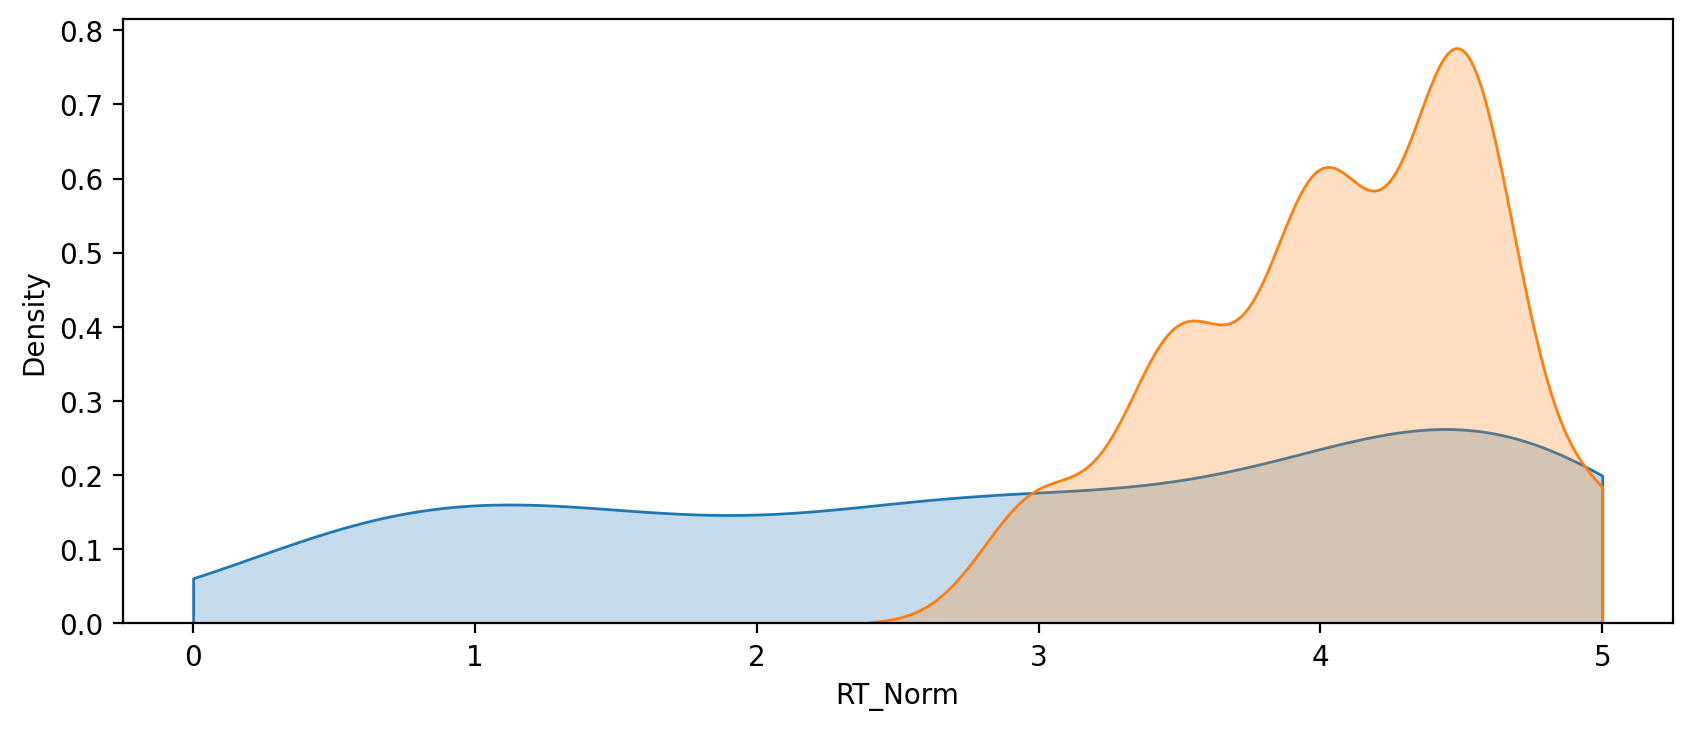

In [185]:
#CODE HERE
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores,x='RT_Norm',shade=True,label='RT_Norm',clip=[0,5])
sns.kdeplot(data=norm_scores,x='STARS',shade=True,label='STARS',clip=[0,5])

<AxesSubplot:ylabel='Count'>

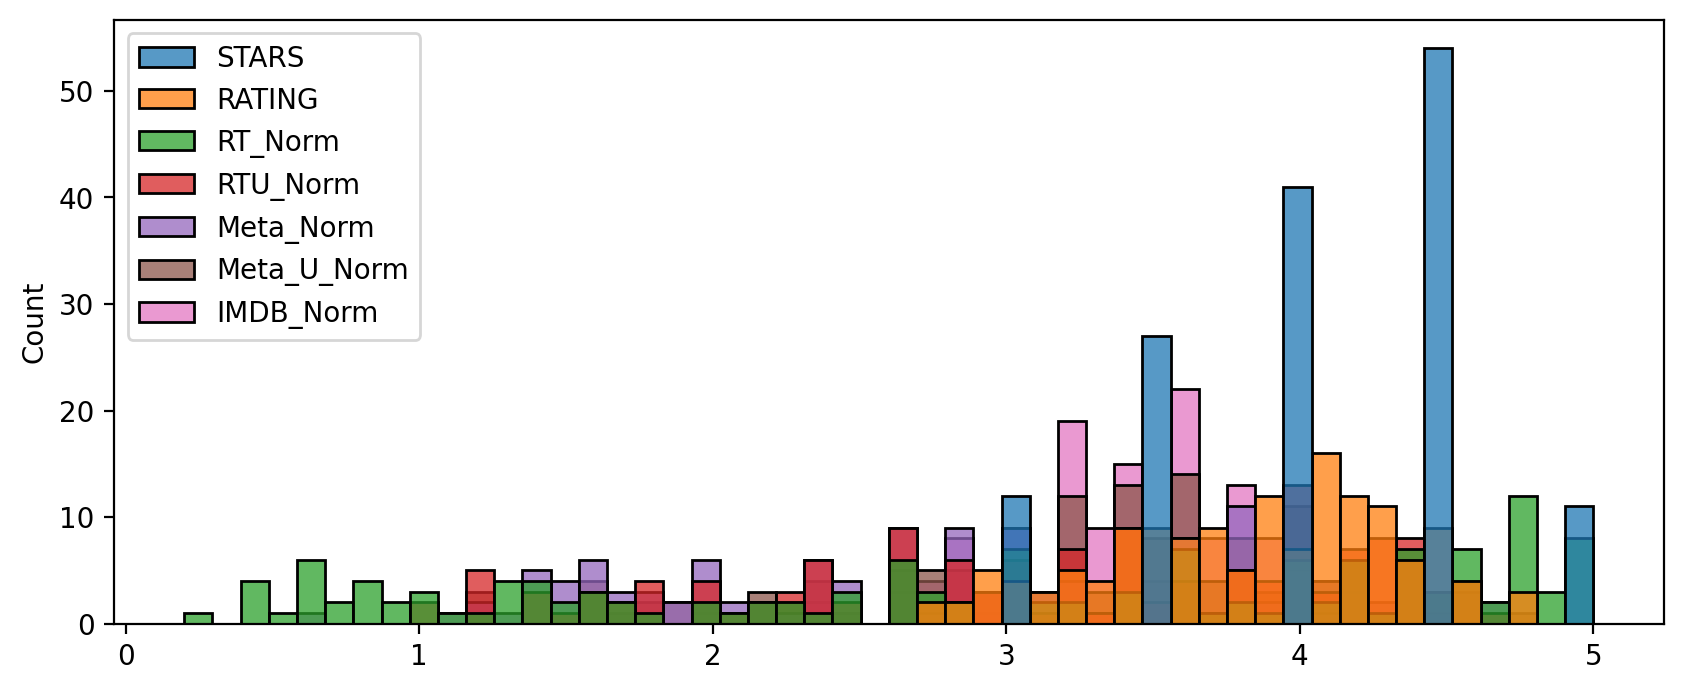

In [188]:
#CODE HERE
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
sns.histplot(data=norm_scores,bins=50)

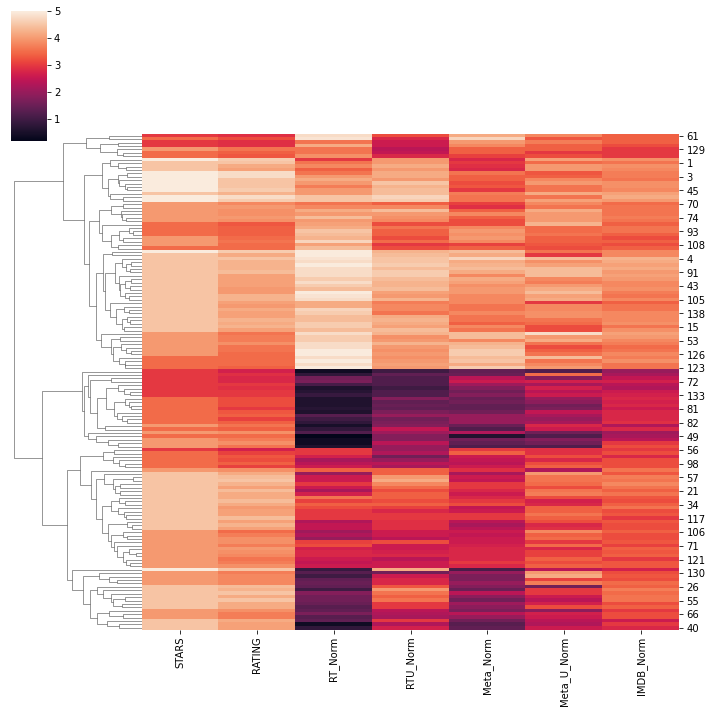

In [192]:
# CODE HERE
sns.clustermap(data=norm_scores[['STARS', 'RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm',
       'IMDB_Norm']],col_cluster=False)

In [195]:
# CODE HERE
norm_scores['FILM'] = combine_df['FILM']

<ipython-input-195-b4f4b680ba4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores['FILM'] = combine_df['FILM']


In [196]:
norm_scores.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

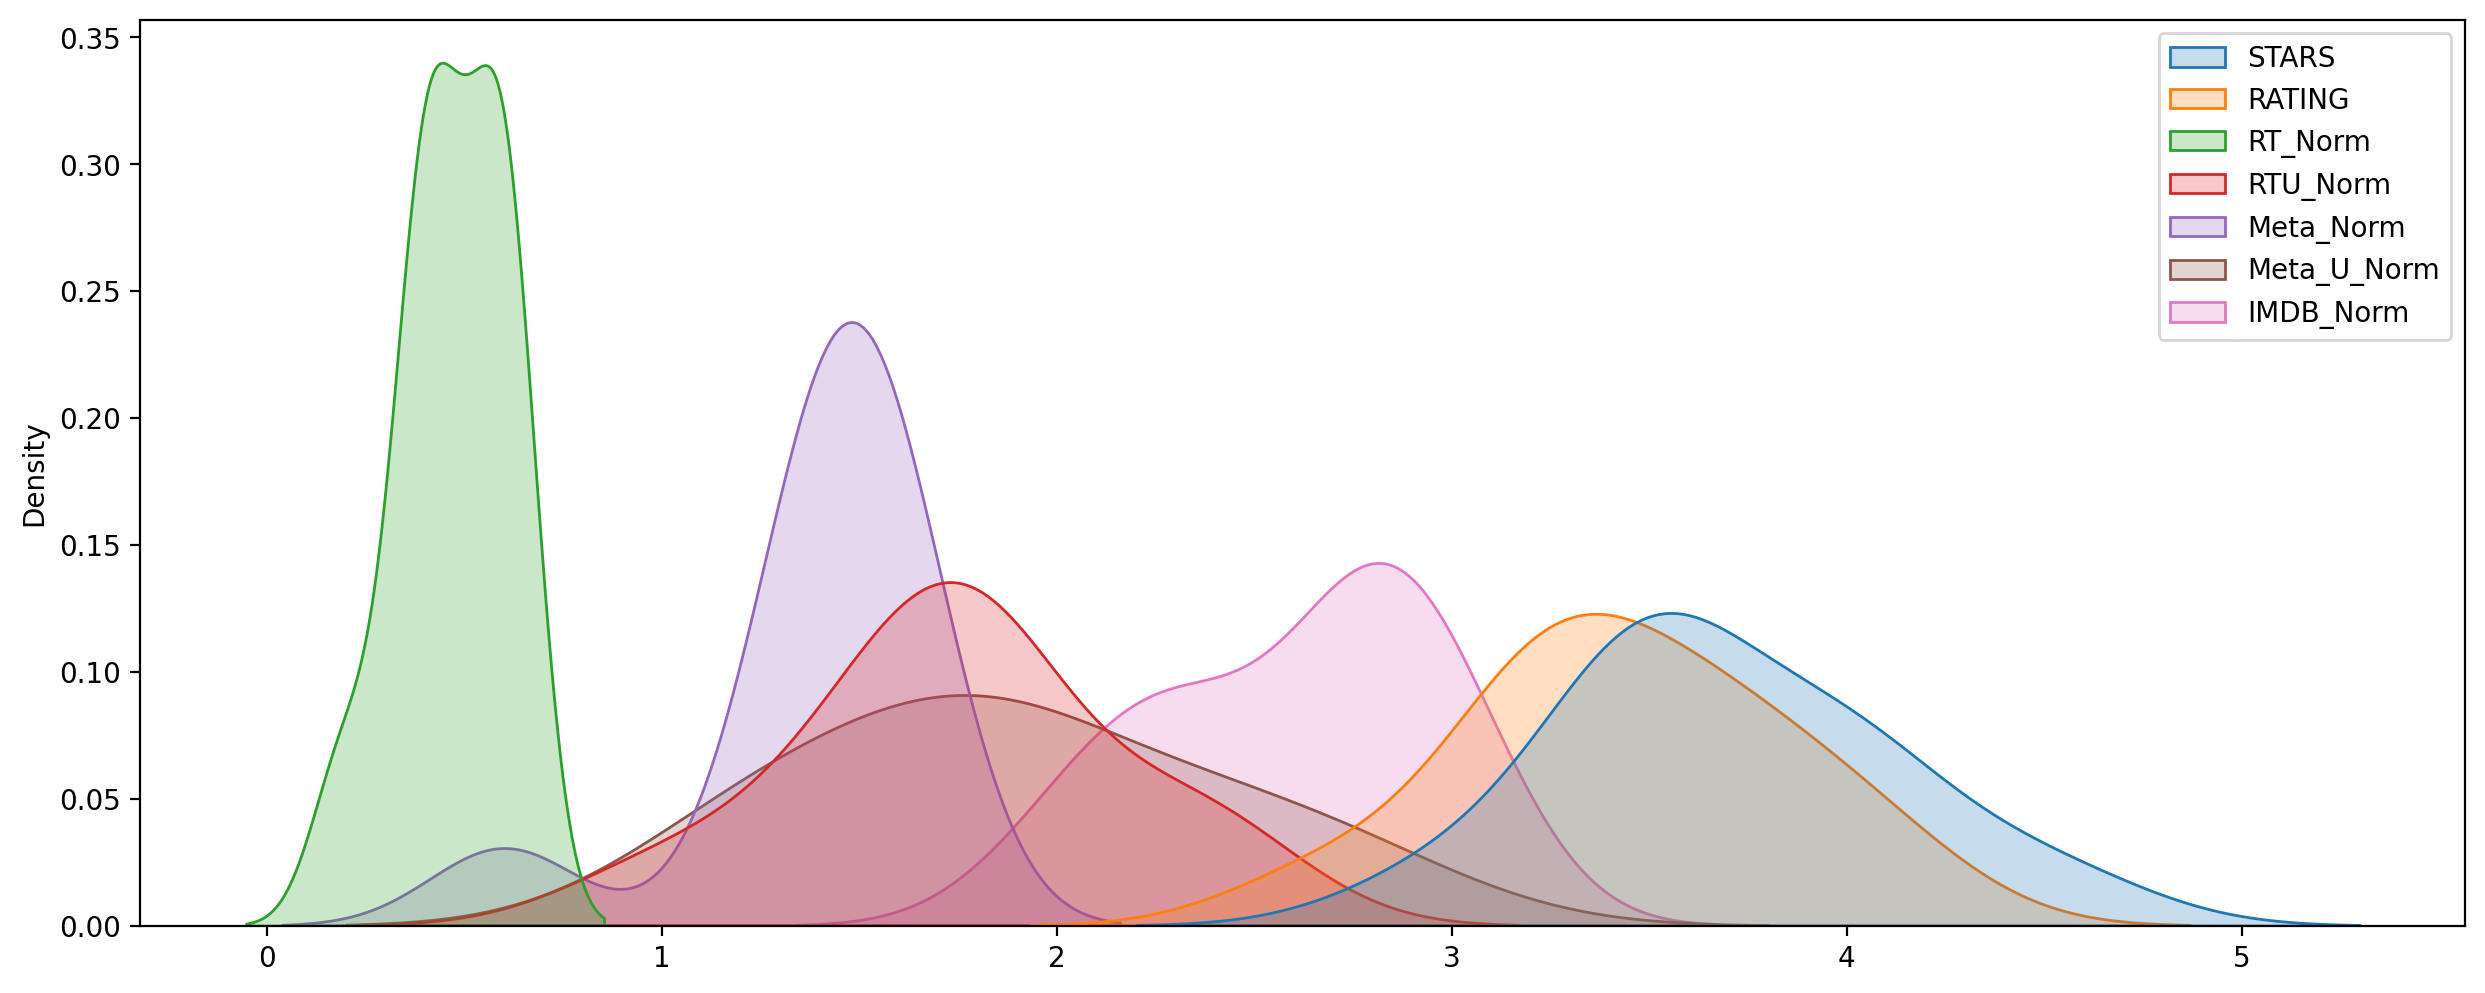

In [200]:
# CODE HERE
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'),shade=True)

----